In [2]:
##I do declare!
import os
import pandas as pd
import seaborn as sns
import numpy
import math
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.multivariate.pca import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [3]:
##load the data
filename = input('Feed me Data!\n (enter filepath)\n') ##enter your file path here - the file is in the repo "summary_stats.csv".
df=pd.read_csv(filename)
df.head(10)

,key,seed,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,...,avg_lowerTargetCushion,dev_lowerTargetCushion,avg_upperTargetWall,dev_upperTargetCushion_1,avg_lowerTargetWall,dev_lowerTargetWall,avg_marketDemand,dev_marketDemand,avg_gohm7dVolatility,devgohm7dVolatility
0,0_399,0,0.125,0.035,0.100,0.29,0.13,0,Yes,Yes,...,3.516755,3.607556,5.214499,5.349134,2.869995,2.944097,0.02847,0.011365,0.591394,0.423414
1,0_366,0,0.150,0.085,0.175,0.22,0.18,3,No,No,...,7.179798,5.468893,10.682138,8.136645,6.829564,5.202117,0.02847,0.011365,0.218499,0.191536
2,0_246,0,0.125,0.090,0.400,0.25,0.11,3,Yes,Yes,...,5.689336,8.014994,7.990640,11.257015,4.794384,6.754209,0.02847,0.011365,0.621255,0.432737
3,0_325,0,0.200,0.100,0.175,0.30,0.11,1,No,Yes,...,8.185280,4.792034,11.956027,6.999600,6.437861,3.769015,0.02847,0.011365,0.167115,0.069445
4,0_112,0,0.475,0.100,0.325,0.27,0.16,1,No,Yes,...,11.328665,4.012265,17.127863,6.066162,9.845150,3.486849,0.02847,0.011365,0.119237,0.056951
5,0_253,0,0.400,0.075,0.200,0.30,0.20,1,Yes,No,...,9.469725,4.523584,15.388303,7.350824,8.286009,3.958136,0.02847,0.011365,0.176140,0.090903
6,0_387,0,0.450,0.040,0.125,0.22,0.13,1,No,No,...,7.411230,3.500576,10.392760,4.908854,6.644551,3.138447,0.02847,0.011365,0.187718,0.114711
7,0_116,0,0.325,0.010,0.175,0.22,0.17,3,Yes,No,...,13.803245,9.650509,20.289107,14.185086,12.971724,9.069153,0.02847,0.011365,0.335241,0.241092
8,0_385,0,0.150,0.085,0.400,0.28,0.14,0,No,Yes,...,6.955361,5.143963,10.352166,7.656131,5.823093,4.306574,0.02847,0.011365,0.176771,0.085805
9,0_287,0,0.100,0.060,0.300,0.21,0.12,3,Yes,Yes,...,5.767218,6.949051,7.929924,9.554946,5.177389,6.238353,0.02847,0.011365,0.662693,0.448994


Now we look at the impact of Dynamic RR and Reinstate Window on a few key metrics.  Dynamic RR seems to have limited impact. Reinstate Window has a stronger visible signal


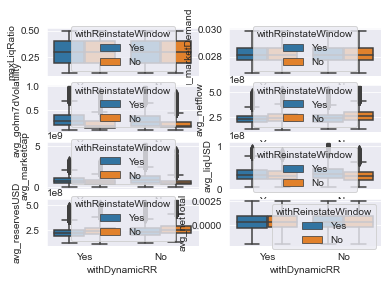

In [4]:
print ("Now we look at the impact of Dynamic RR and Reinstate Window on a few key metrics.  Dynamic RR seems to have limited impact. Reinstate Window has a stronger visible signal")
plt.rc("figure", figsize=(50, 100))
plt.rc("font", size=20)
fig, axs = plt.subplots(ncols=2, nrows=4)
sns.boxplot(data=df, x="withDynamicRR", y="maxLiqRatio", hue = "withReinstateWindow", ax=axs[0,0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_marketDemand",hue = "withReinstateWindow", ax=axs[0,1])
sns.boxplot(data=df, x="withDynamicRR", y="avg_gohm7dVolatility",hue = "withReinstateWindow", ax=axs[1,0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_netflow",hue = "withReinstateWindow", ax=axs[1,1])
sns.boxplot(data=df, x="withDynamicRR", y="avg_marketcap",hue = "withReinstateWindow", ax=axs[2,0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_liqUSD",hue = "withReinstateWindow", ax=axs[2,1])
sns.boxplot(data=df, x="withDynamicRR", y="avg_reservesUSD",hue = "withReinstateWindow", ax=axs[3,0])
sns.boxplot(data=df, x="withDynamicRR", y="avg_netTotal",hue = "withReinstateWindow", ax=axs[3,1])
plt.show()

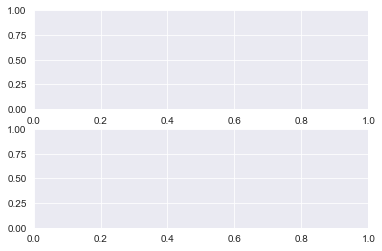

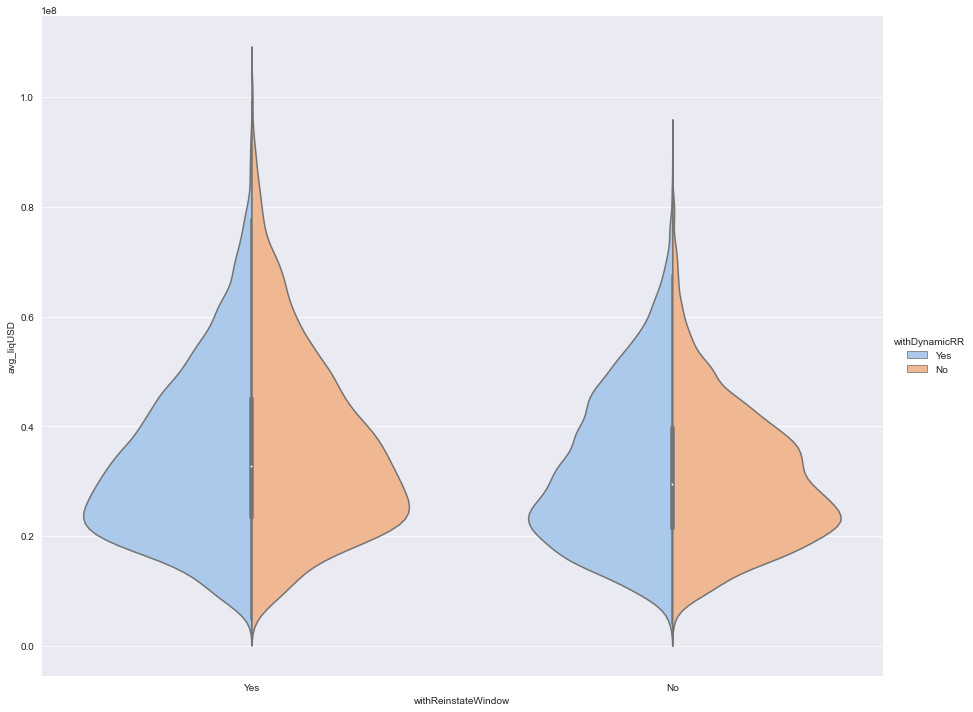

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=2)
sns.catplot(x="withReinstateWindow", y="avg_liqUSD", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

an interesting way to look at the impact of RR and Reinstate Window on netflow.


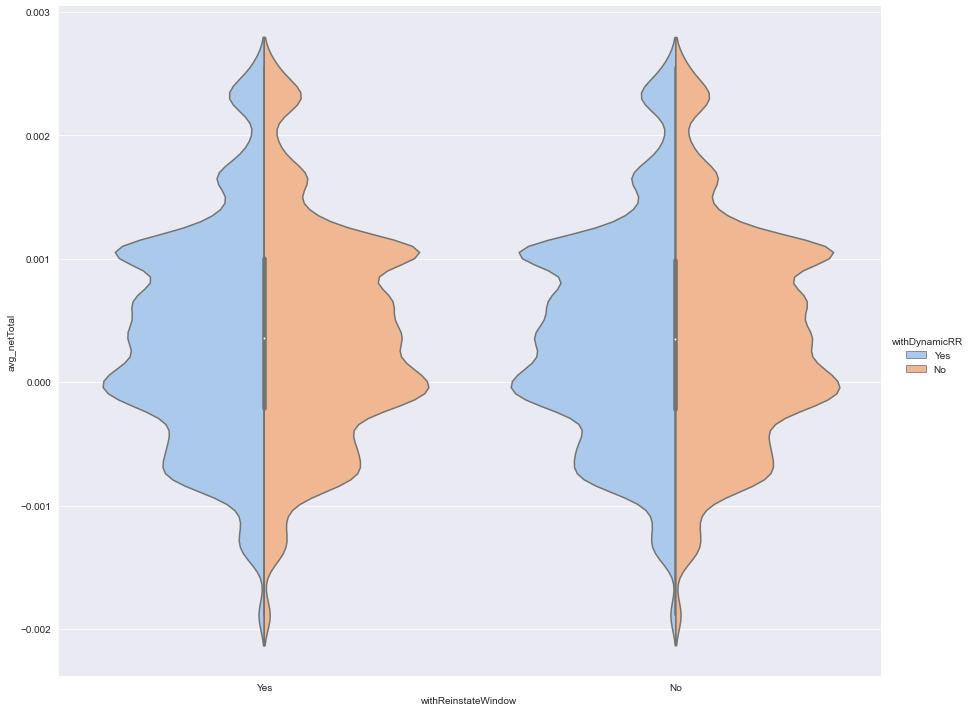

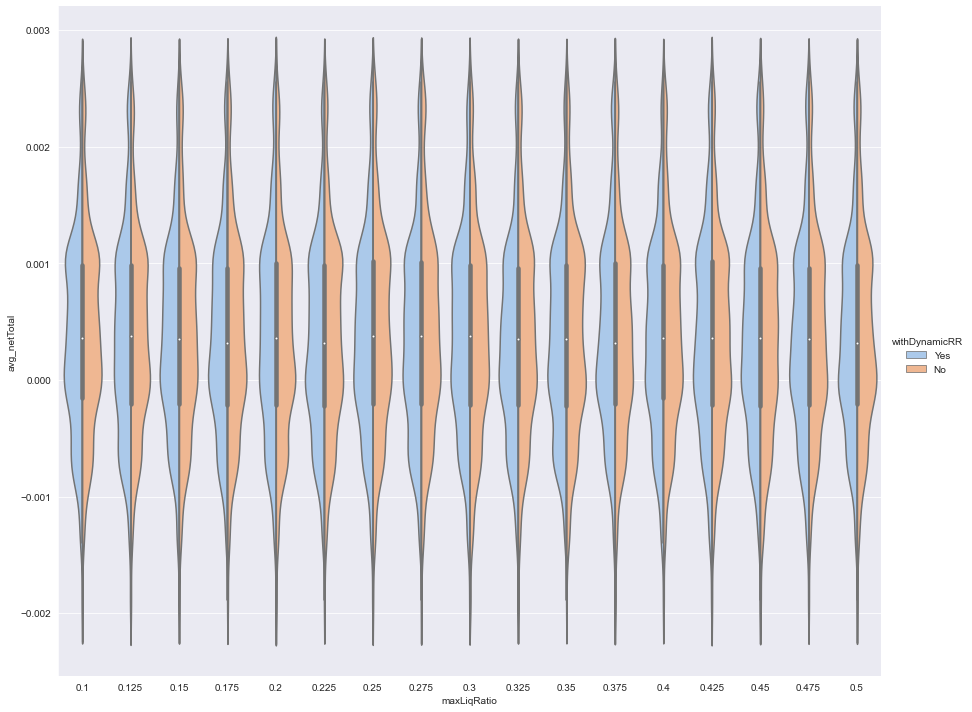

In [6]:
print("an interesting way to look at the impact of RR and Reinstate Window on netflow.")

sns.catplot(x="withReinstateWindow", y="avg_netTotal", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

sns.catplot(x="maxLiqRatio", y="avg_netTotal", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

plt.show()

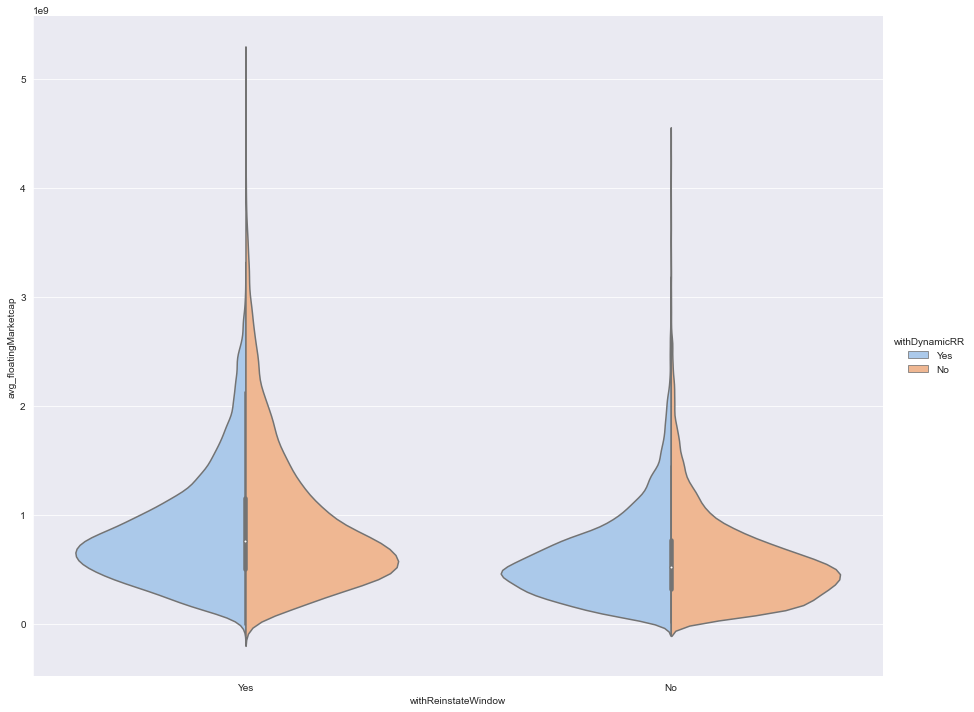

In [7]:
sns.catplot(x="withReinstateWindow", y="avg_floatingMarketcap", hue="withDynamicRR",
            kind="violin", split=True,
            palette="pastel", data=df
            ,height = 10, aspect = 1.25)

Taking a gander at MaxLiqRatio

Now we look at the impact of Dynamic RR and Reinstate Window on a few key metrics.  Dynamic RR seems to have limited impact. Reinstate Window has a stronger visible signal


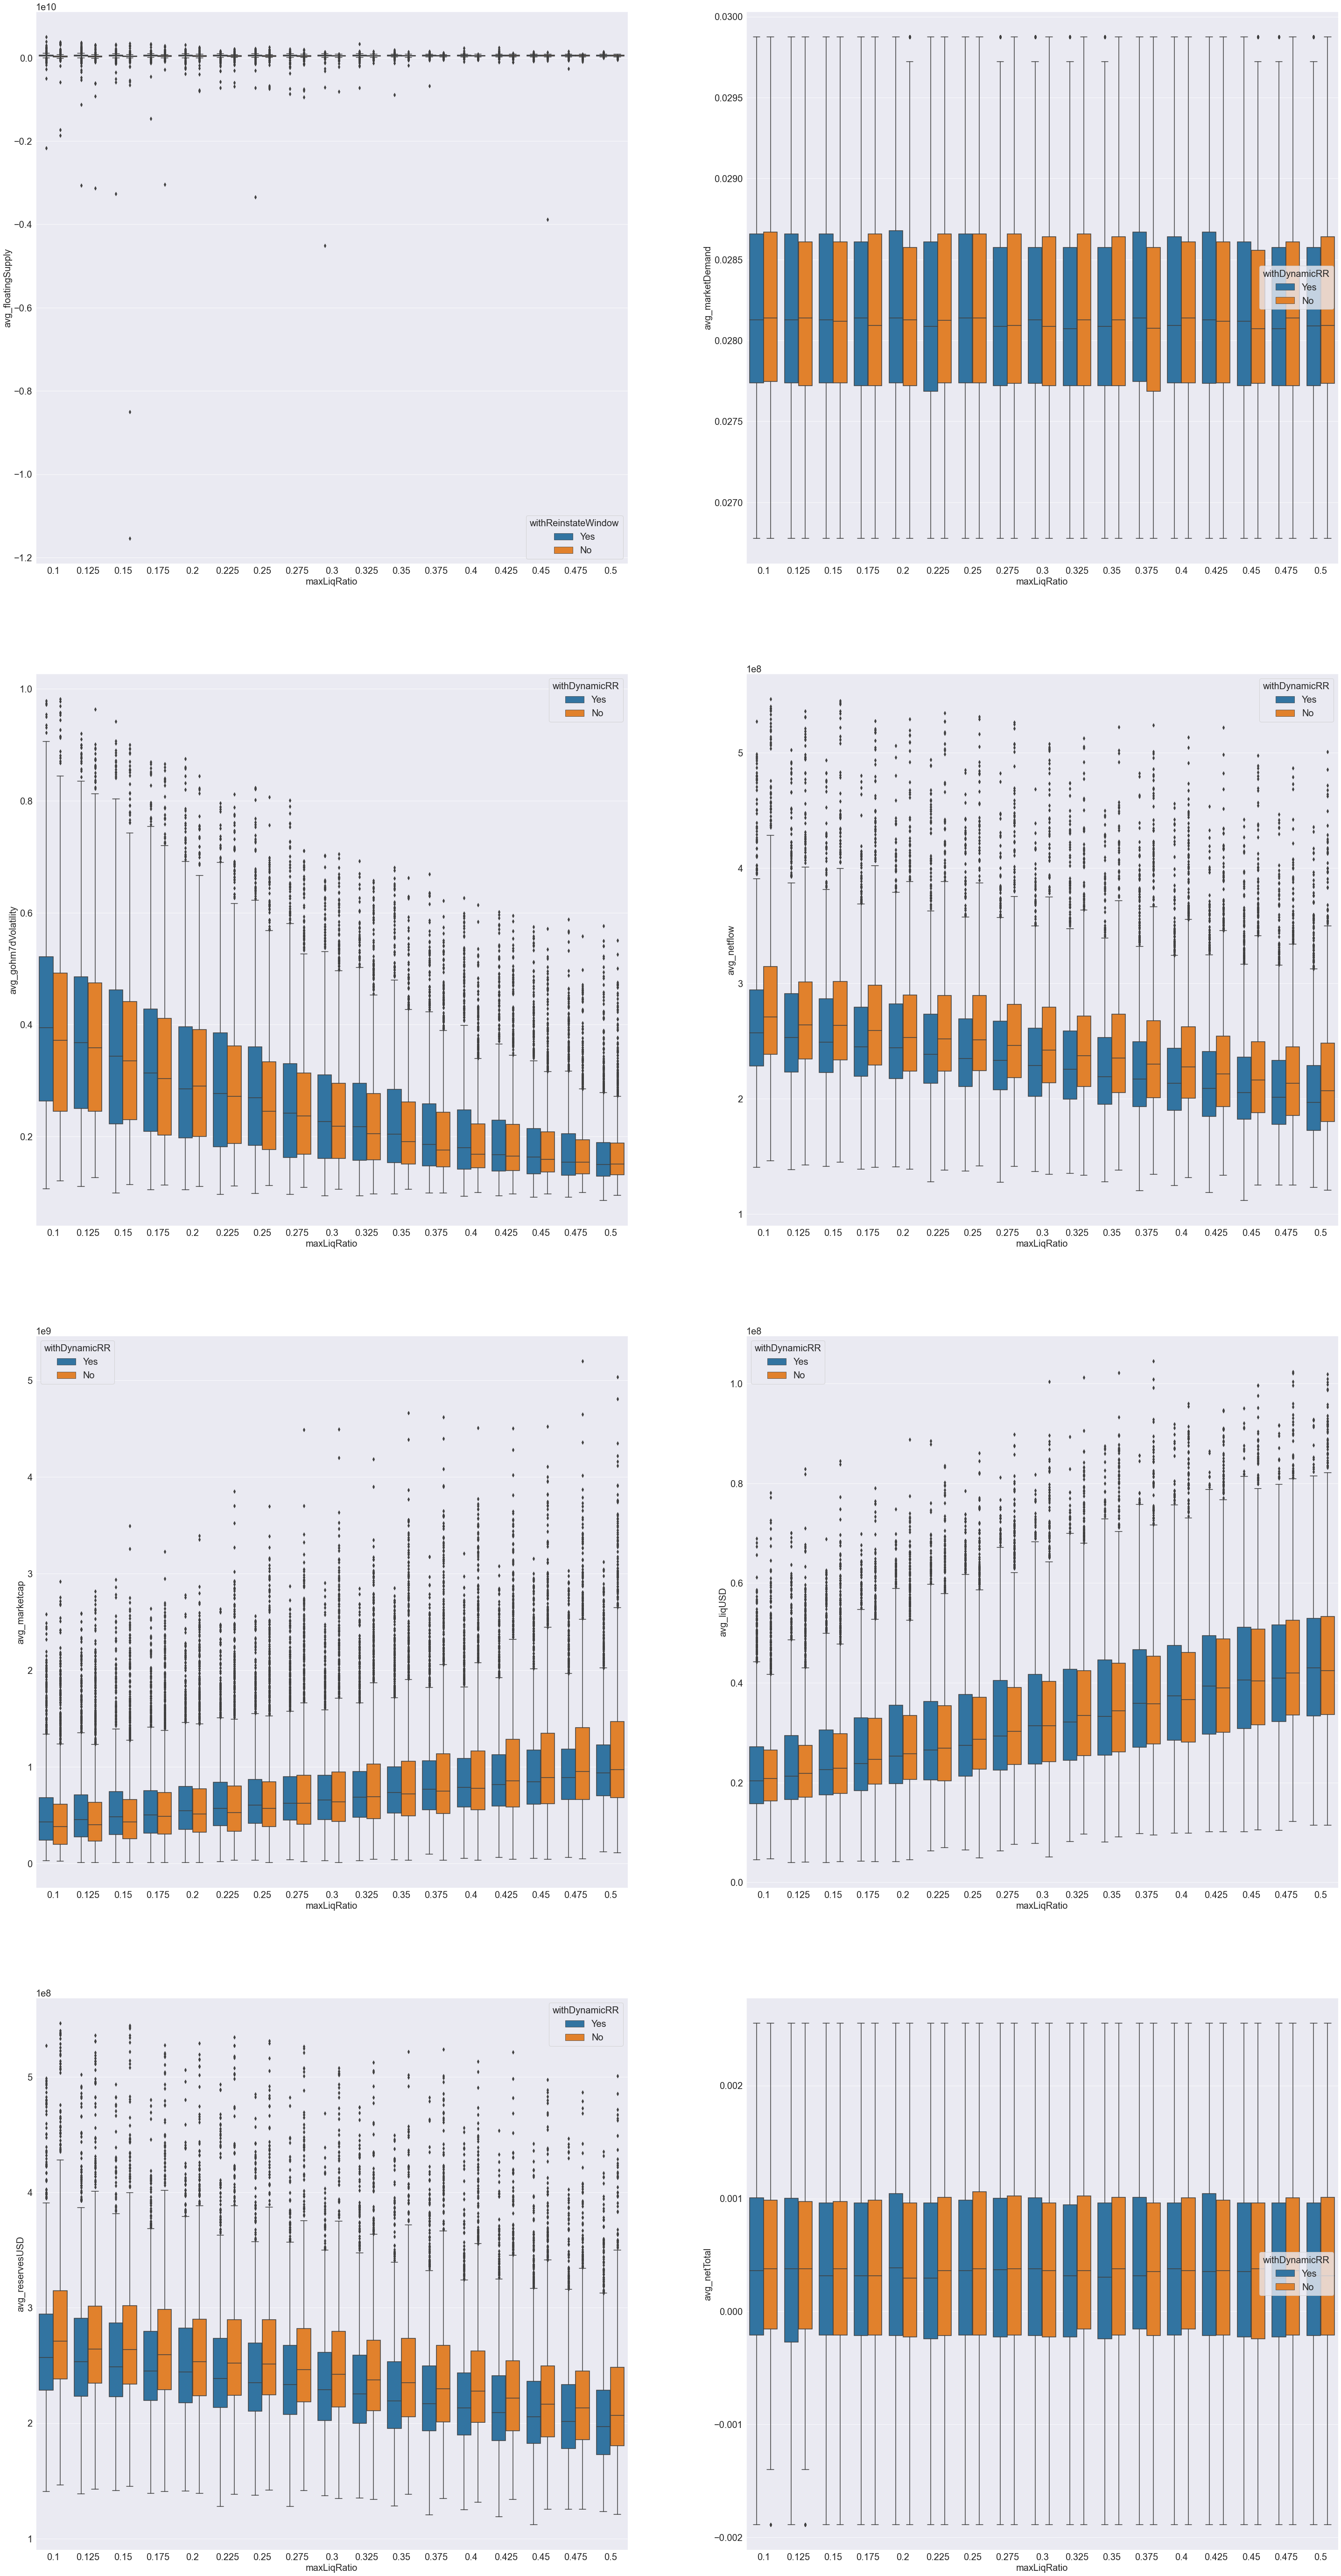

In [8]:

plt.rc("figure", figsize=(50, 100))
plt.rc("font", size=20)
fig, axs = plt.subplots(ncols=2, nrows=4)
sns.boxplot(data=df, x="maxLiqRatio", y="avg_floatingSupply", hue = "withReinstateWindow", ax=axs[0,0])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_marketDemand",hue = "withDynamicRR", ax=axs[0,1])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_gohm7dVolatility",hue = "withDynamicRR", ax=axs[1,0])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_netflow",hue = "withDynamicRR", ax=axs[1,1])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_marketcap",hue = "withDynamicRR", ax=axs[2,0])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_liqUSD",hue = "withDynamicRR", ax=axs[2,1])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_reservesUSD",hue = "withDynamicRR", ax=axs[3,0])
sns.boxplot(data=df, x="maxLiqRatio", y="avg_netTotal",hue = "withDynamicRR", ax=axs[3,1])
plt.show()

These are interesting and warrant more investigation. It's hard to tell the difference in the means, though. Let's try a simple are plot.

In [9]:
#sns.relplot(data=df, x="avg_treasury", y = "avg_netflow", hue = "withReinstateWindow")

# Some info on MANOVA
Per Wikipedia: 'In statistics, multivariate analysis of variance is a procedure for comparing multivariate sample means. As a multivariate procedure, it is used when there are two or more dependent variables, and is often followed by significance tests involving individual dependent variables separately.'

MANOVAs make the following assumptions:
Residuals follow a multivariate normal prob dist (means equal to zero)
Variance-covariance matrices of each group of residuals are equal
Observations are independent

Unless I do some validation I can only be sure of the third assumption. Dammit

Okay - I think it's still important to look at  pairwise relations. I'll make things cleaner and remove the stanard deviation columns. We are not using them so far.

And for the correlations and Covariances matrixes, we have to remove the std deviation columns and the independent variables. Since we can't measure correlation between categorical variables, we do away with those as well. Also, the seed.

In [10]:
df2 = df.drop(['dev_marketcap','dev_price','dev_netflow', 'dev_treasury', 'dev_floatingMarketcap', 'dev_askCapacity', 'dev_askCapacityCushion', 'dev_askCapacityTarget', 'dev_askCapacityTargetCushion', 'dev_askCount', 'dev_bidCapacityCushion', 'dev_bidCapacityTarget', 'dev_bidCapacityTargetCushion', 'dev_bidCapaciy', 'dev_bidCount', 'dev_bidCount', 'dev_floatingSupply', 'dev_liqFloatingMCRatio', 'dev_liqOHM', 'dev_liqRatio_liqReserves', 'dev_liqRatio_liqTreasury', 'dev_liqUSD', 'dev_lowerTargetCushion', 'dev_lowerTargetWall', 'dev_marketDemand', 'dev_netflow', 'dev_netTotal', 'dev_price', 'dev_reserveChange', 'dev_reserveRatio', 'dev_reservesUSD', 'dev_upperTargetCushion', 'dev_upperTargetCushion_1', 'devgohm7dVolatility' ], axis=1)

df3 = df.drop(['mintSyncPremium', 'withReinstateWindow','withDynamicRR','key','dev_marketcap','dev_price','dev_netflow', 'dev_treasury', 'dev_floatingMarketcap', 'dev_askCapacity', 'dev_askCapacityCushion', 'dev_askCapacityTarget', 'dev_askCapacityTargetCushion', 'dev_askCount', 'dev_bidCapacityCushion', 'dev_bidCapacityTarget', 'dev_bidCapacityTargetCushion', 'dev_bidCapaciy', 'dev_bidCount', 'dev_bidCount', 'dev_floatingSupply', 'dev_liqFloatingMCRatio', 'dev_liqOHM', 'dev_liqRatio_liqReserves', 'dev_liqRatio_liqTreasury', 'dev_liqUSD', 'dev_lowerTargetCushion', 'dev_lowerTargetWall', 'dev_marketDemand', 'dev_netflow', 'dev_netTotal', 'dev_price', 'dev_reserveChange', 'dev_reserveRatio', 'dev_reservesUSD', 'dev_upperTargetCushion', 'dev_upperTargetCushion_1', 'devgohm7dVolatility', 'wall', 'askFactor', 'seed', 'maxLiqRatio', 'cushionFactor', 'cushion' ], axis=1)

##STOP - MEMORY HOGGER
##sns.set(rc = {'figure.figsize':(100,100)})
sns.pairplot(data=df2)
path =os.getcwd() +'\\pairwise_chart.png'
plt.savefig(path, dpi=100)
##Having said that, I expect it to be nice eye candy

The pretty eye candy has been saved to the directory
Let's look at variance and covariance matrixes

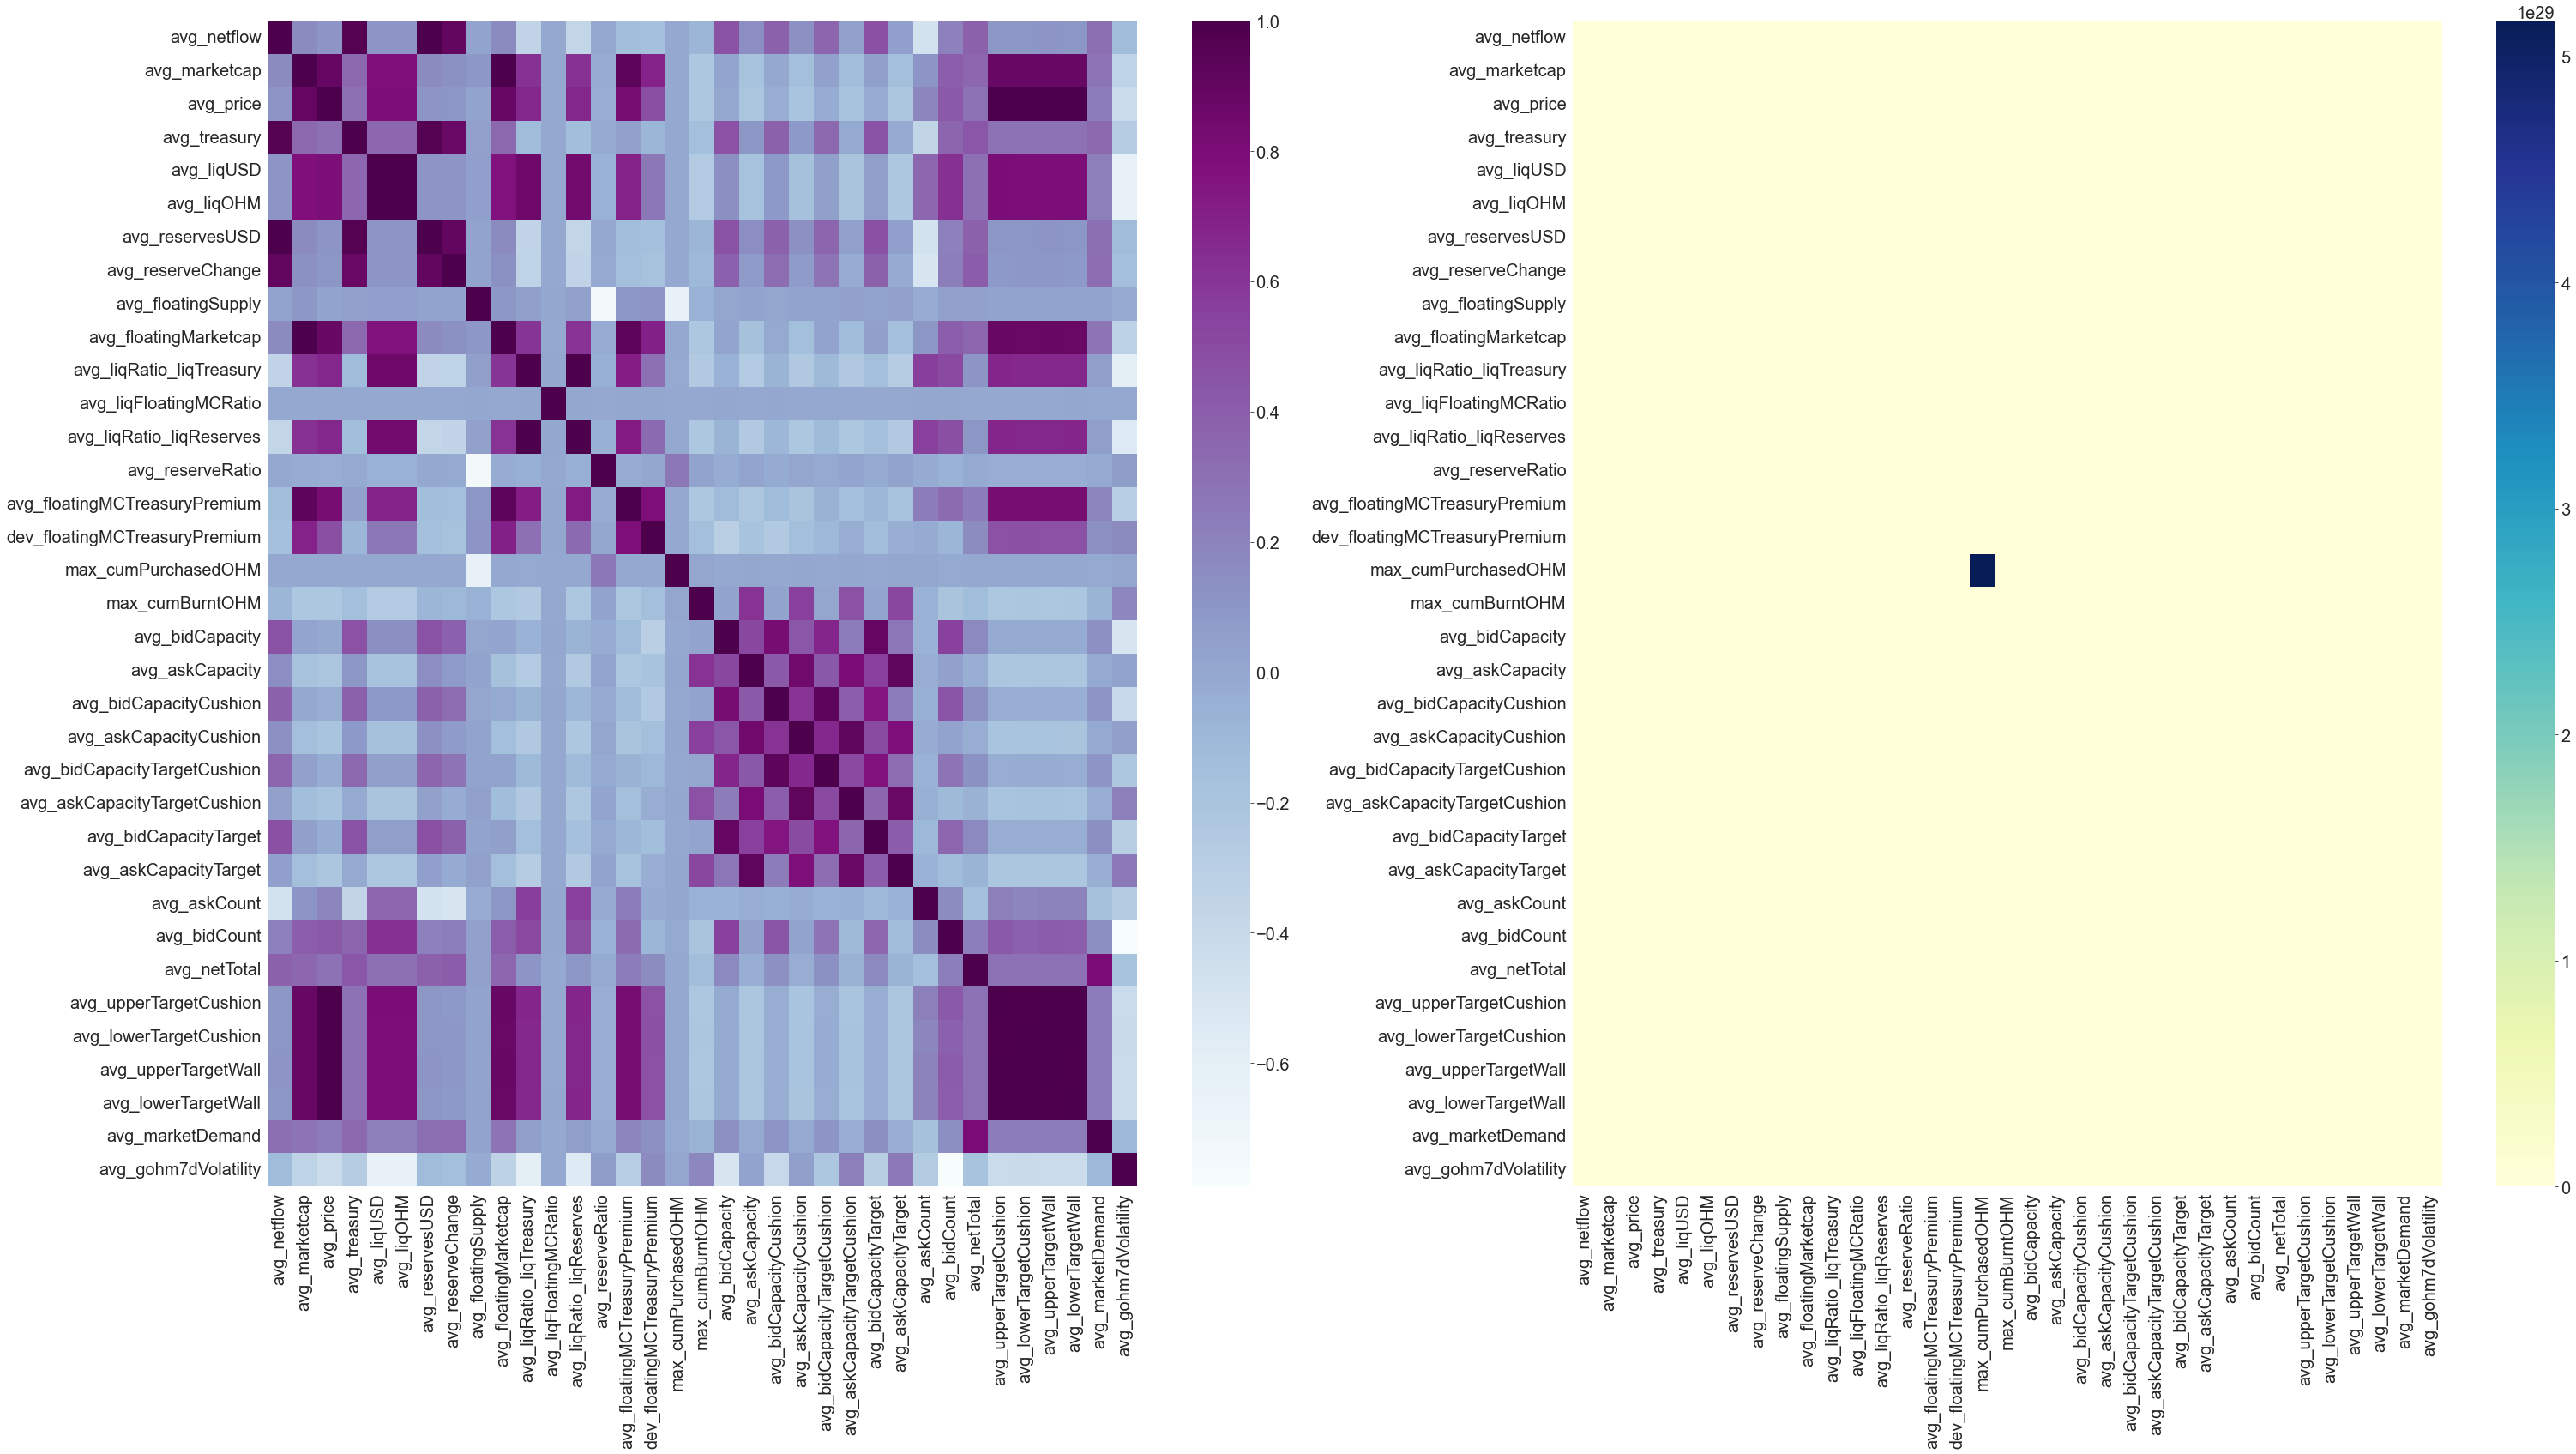

In [12]:
fig, axs = plt.subplots(ncols=2, nrows=1)
corrMatrix = pd.DataFrame.corr(df3)
sns.heatmap(corrMatrix, annot=False, cmap='BuPu', ax=axs[0])

covMatrix = pd.DataFrame.cov(df3)
sns.heatmap(covMatrix, annot=False, cmap='YlGnBu', ax=axs[1])

plt.gcf().set_size_inches(50, 25)
path =os.getcwd() +'\\covariancematrix.png'
plt.savefig(path, dpi=100)
plt.show()

Honestly, this concerns me. Some of these variables are very correlated. It might be best to remove any dependent variable that is not critical. Let's discuss when we can.

OF COURSE floating marketcap, price, treasury, and marketcap have high covariance! We need to remove one of the two. Let's keep marketcap.

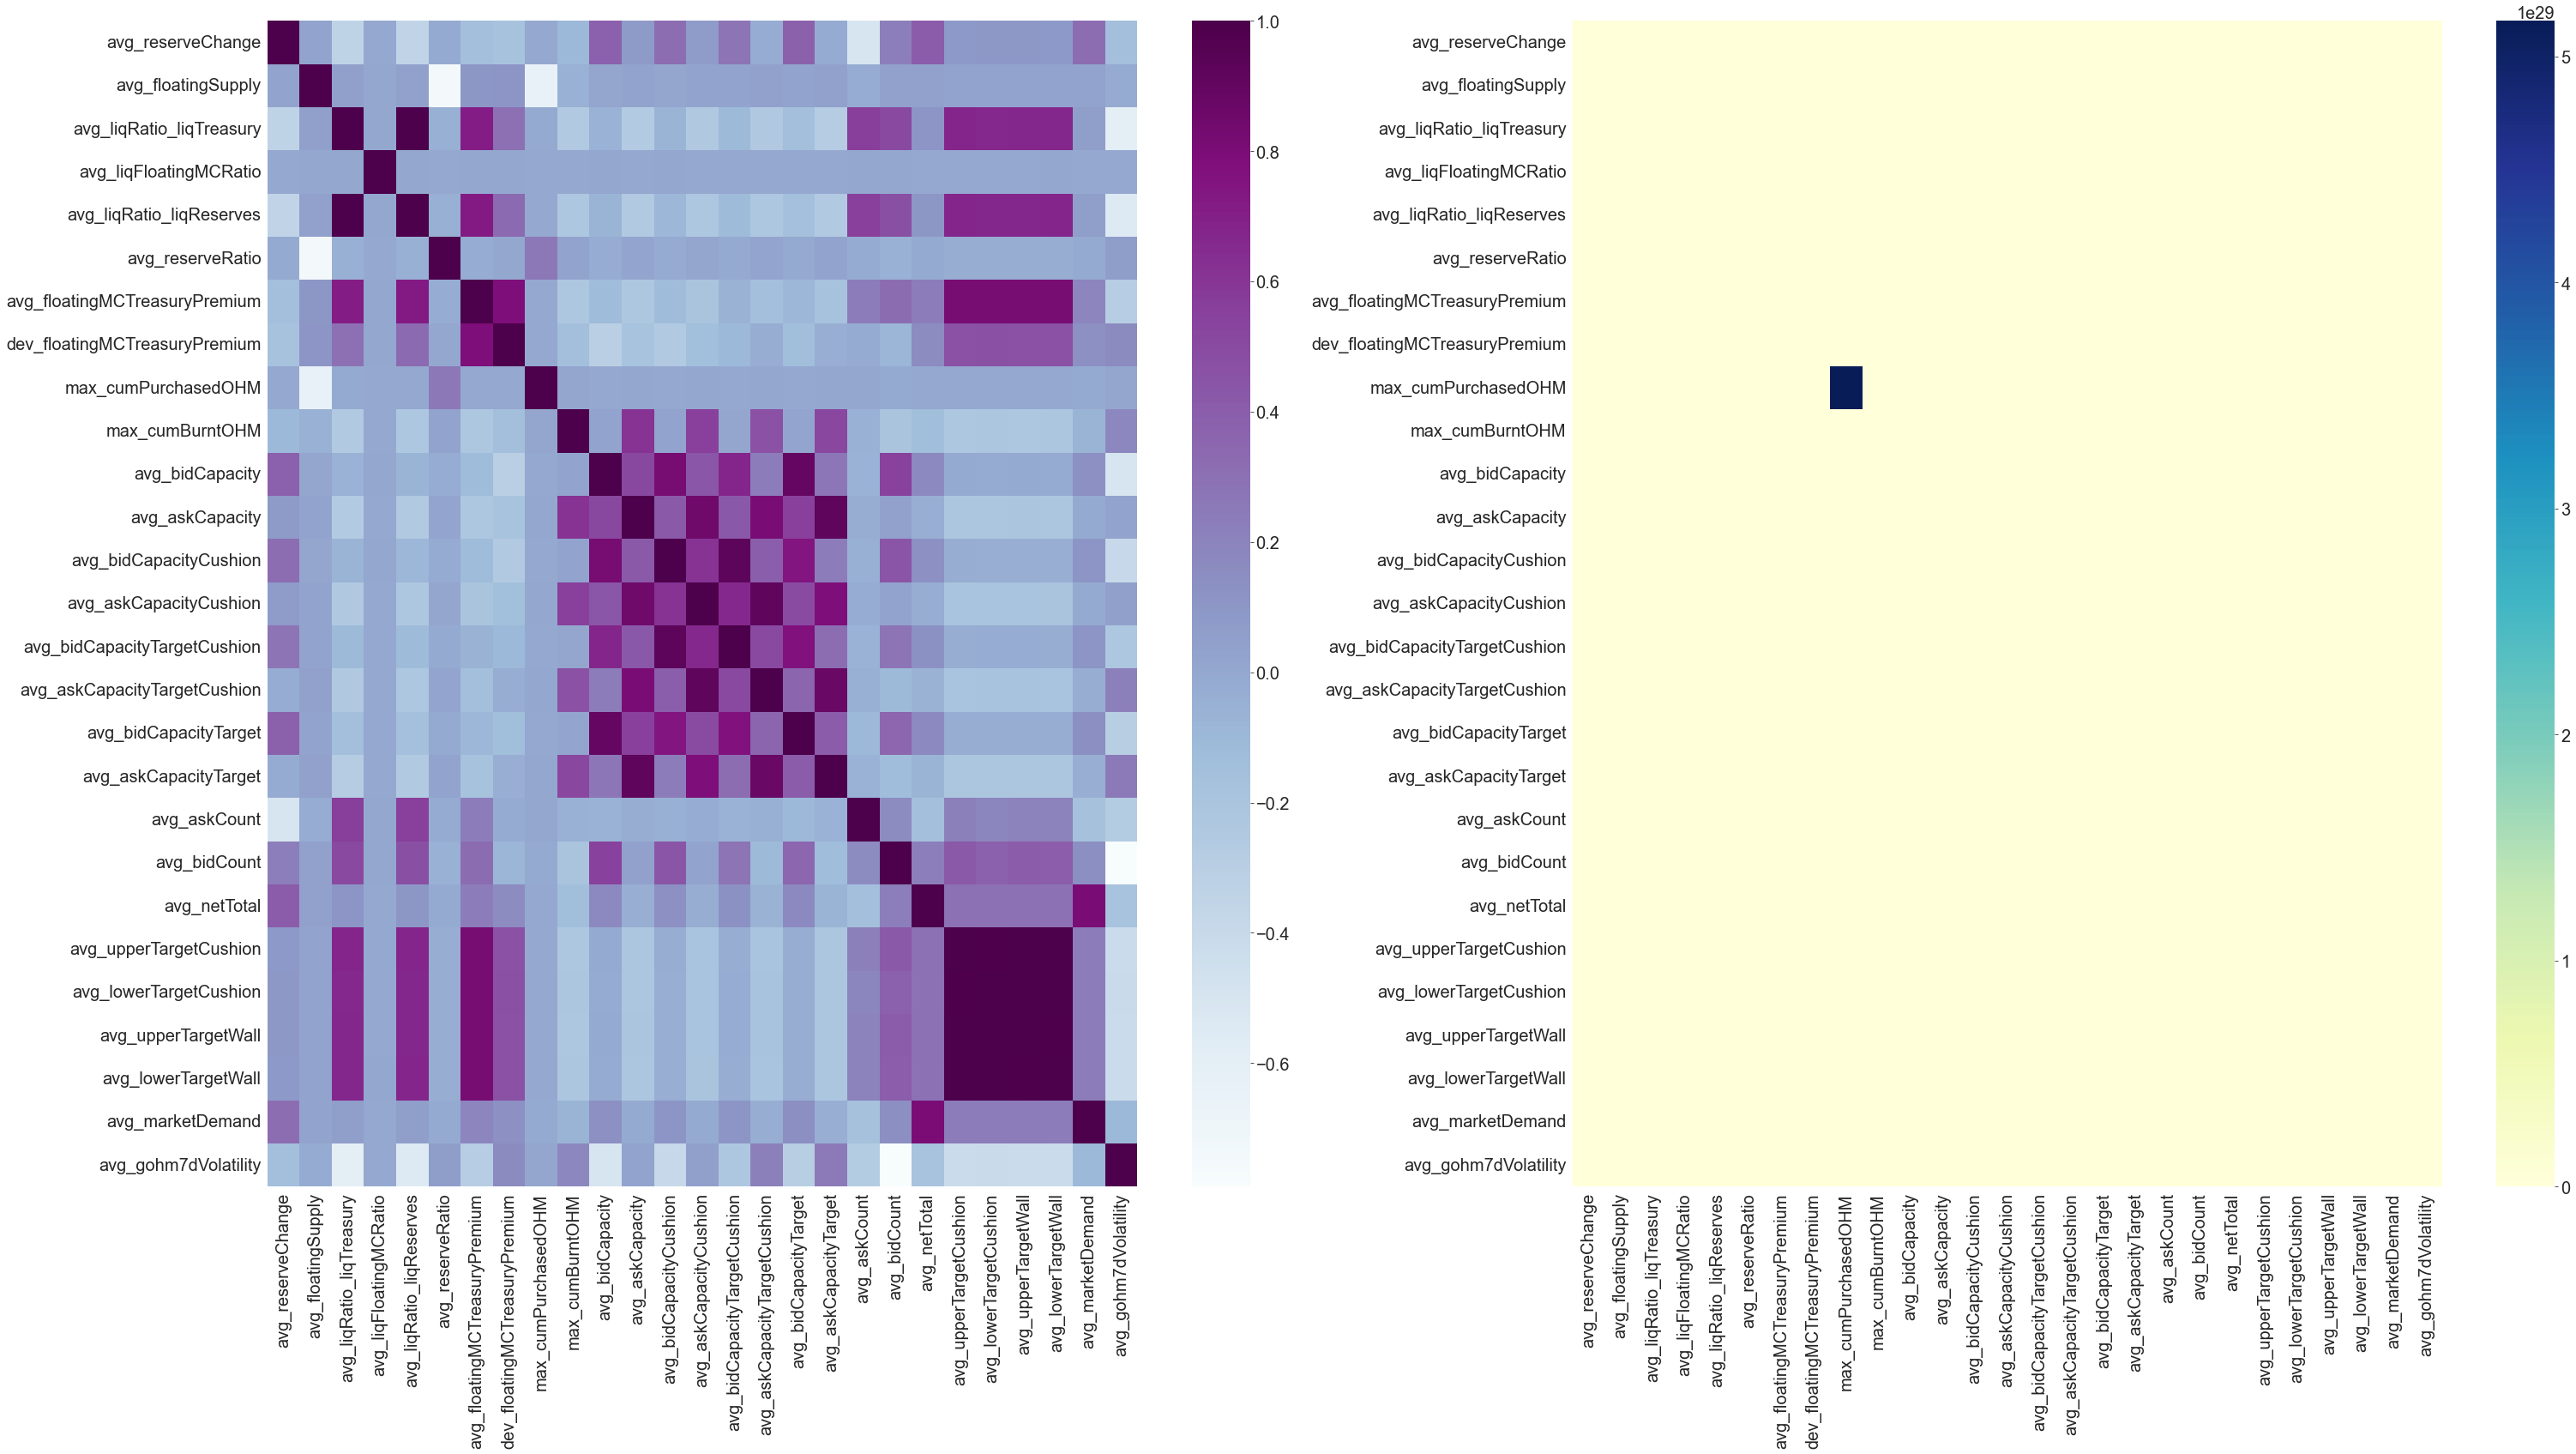

In [13]:
df4 = df3.drop(['avg_floatingMarketcap', 'avg_price', 'avg_treasury', 'avg_liqUSD', 'avg_liqOHM', 'avg_marketcap', 'avg_netflow', 'avg_reservesUSD' ], axis=1)

fig, axs = plt.subplots(ncols=2, nrows=1)
corrMatrix = pd.DataFrame.corr(df4)
sns.heatmap(corrMatrix, annot=False, cmap='BuPu', ax=axs[0])

covMatrix = pd.DataFrame.cov(df4)
sns.heatmap(covMatrix, annot=False, cmap='YlGnBu', ax=axs[1])

plt.gcf().set_size_inches(50, 25)
path =os.getcwd() +'\\covariancematrix2.png'
plt.savefig(path, dpi=100)
plt.show()

I keep removing layers, but the data turns out to be highly covariant.

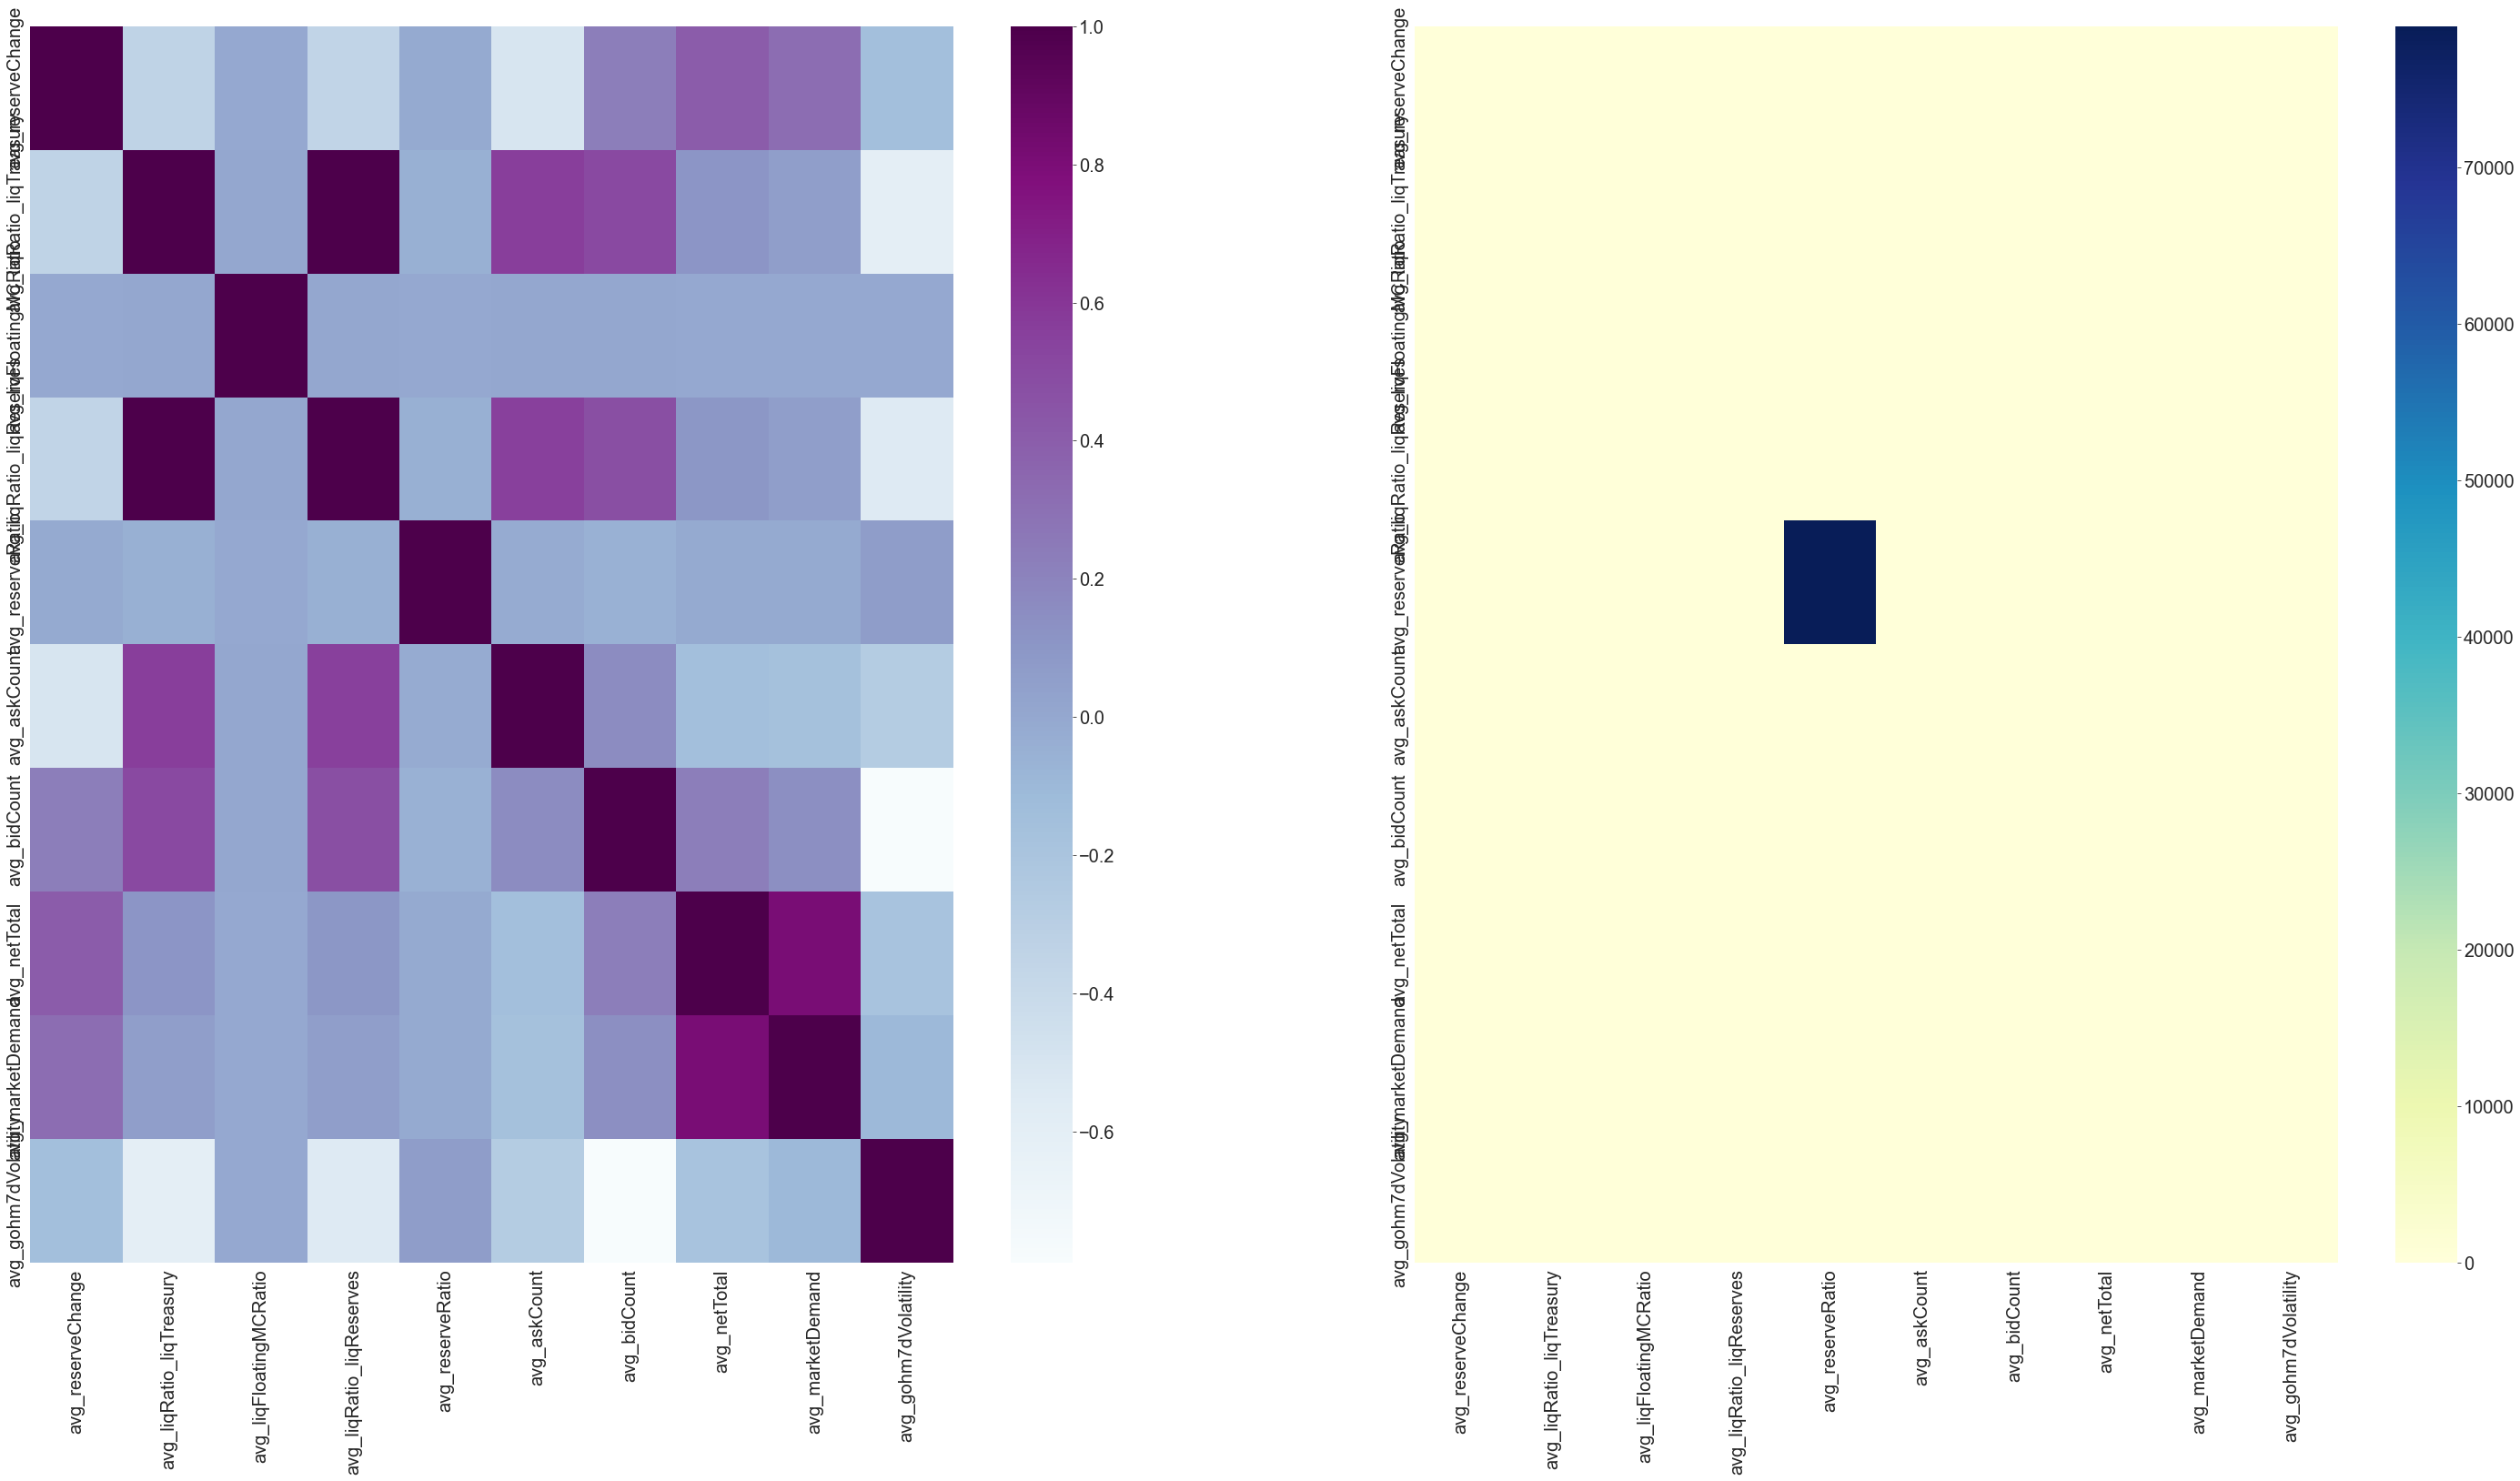

In [14]:
df5 = df4.drop(['avg_floatingSupply', 'avg_bidCapacityTarget', 'avg_bidCapacity', 'max_cumPurchasedOHM', 'avg_bidCapacityCushion', 'avg_askCapacityTargetCushion', 'avg_bidCapacityTargetCushion', 'max_cumBurntOHM', 'avg_askCapacityCushion', 'avg_askCapacity', 'avg_askCapacityTarget' , 'avg_lowerTargetCushion', 'avg_lowerTargetWall', 'avg_upperTargetWall', 'avg_upperTargetCushion', 'avg_floatingMCTreasuryPremium', 'dev_floatingMCTreasuryPremium'], axis=1)
fig, axs = plt.subplots(ncols=2, nrows=1)
corrMatrix = pd.DataFrame.corr(df5)
sns.heatmap(corrMatrix, annot=False, cmap='BuPu', ax=axs[0])

covMatrix = pd.DataFrame.cov(df5)
sns.heatmap(covMatrix, annot=False, cmap='YlGnBu', ax=axs[1])

plt.gcf().set_size_inches(50, 25)
path =os.getcwd() +'\\covariancematrix2.png'
plt.savefig(path, dpi=100)
plt.show()

In [15]:
##Let's Manova, baby. The first set of variables are the dependent variables, followed by the independent. In this case, let's test that avg marketcap and netflow are driven by the parameters
fit = MANOVA.from_formula('avg_netflow '
                          '+ dev_netflow '
                          '+ avg_marketcap '
                          '+ dev_marketcap '
                          '+ avg_price '
                          '+ dev_treasury'
                          ' + avg_treasury'
                          ' + avg_liqUSD'
                          ' + avg_liqOHM'
                          ' + avg_reservesUSD'
                          ' + avg_reserveChange'
                          ' + avg_floatingSupply'
                          ' + avg_floatingMarketcap'
                          ' + avg_liqRatio_liqTreasury'
                          ' + avg_liqFloatingMCRatio'
                          ' + avg_liqRatio_liqReserves'
                          ' + avg_reserveRatio'
                          ' + avg_floatingMCTreasuryPremium'
                          ' + max_cumPurchasedOHM'
                          ' + avg_bidCapacity'
                          ' + avg_askCapacity'
                          ' + avg_bidCapacityCushion'
                          ' + avg_askCapacityCushion'
                          ' + avg_bidCapacityTargetCushion'
                          ' + avg_askCapacityTargetCushion'
                          ' + avg_bidCapacityTarget'
                          ' + avg_askCapacityTarget'
                          ' + avg_askCount'
                          ' + avg_bidCount'
                          ' + avg_netTotal'
                          ' + avg_upperTargetCushion'
                          ' + avg_lowerTargetCushion'
                          ' + avg_upperTargetWall'
                          ' + avg_lowerTargetWall'
                          ' + avg_marketDemand'
                          ' + avg_gohm7dVolatility '

                          '~ maxLiqRatio '
                          #'+askFactor '
                          '+cushionFactor '
                          '+wall '
                          '+cushion '
                          '+mintSyncPremium '
                          '+withReinstateWindow '
                          '+withDynamicRR' , data=df)
print(fit.mv_test())


                         Multivariate linear model
                                                                           
---------------------------------------------------------------------------
       Intercept          Value    Num DF   Den DF       F Value     Pr > F
---------------------------------------------------------------------------
          Wilks' lambda     0.0000 4.0000 66521.0000 1301918349.8425 0.0000
         Pillai's trace     1.0311 4.0000 66521.0000    -551712.6619 1.0000
 Hotelling-Lawley trace 75852.0078 4.0000 66521.0000 1261437853.0733 0.0000
    Roy's greatest root 75851.9757 4.0000 66521.0000 1261437319.3958 0.0000
---------------------------------------------------------------------------
                                                                           
----------------------------------------------------------------------------
       withReinstateWindow    Value   Num DF    Den DF     F Value    Pr > F
-----------------------------------

## Interpreting results

A MANOVA's null hypothesis is that the means of all treatments are equal. The larger the F-statistic, the greater the impact that metrics has had on the overall variance of the dependent variables.

Wilk’s lambda tests if there are differences between group means for a particular combination of dependent variables. It is similar to the F-test statistic in an ANOVA. A value of zero means that there isn’t any variance not explained by the independent variable (which is what indicates it's impactful). In other words, **the closer to zero the statistic is, the more the variable in question contributes to the model**. You would reject the null hypothesis when Wilk’s lambda is close to zero, although this should be done **in combination with a small p-value**.

Pillai’s trace is another test to measure impact on the dependent variable means. Increasing values means that effects are contributing more to the model; you should reject the null hypothesis for large values. **The closer Pillai’s trace is to 1, the stronger the evidence that the explanatory variable has a statistically significant effect on the values of the response variables.**

Hotelling's Trace and Roy's Greatest root are not really used anymore. I just ignore them.


Let's run a manova using only the variables that did not have high correlation. This, in theory, is a more appropriate application of the test.

In [16]:
##Let's Manova, baby. The first set of variables are the dependent variables, followed by the independent. In this case, let's test that avg marketcap and netflow are driven by the parameters
fit = MANOVA.from_formula(' avg_reserveChange'
                          ' + avg_liqRatio_liqTreasury'
                          ' + avg_liqFloatingMCRatio'
                          ' + avg_liqRatio_liqReserves'
                          ' + avg_reserveRatio'
                          ' + avg_askCount'
                          ' + avg_bidCount'
                          ' + avg_netTotal'
                          ' + avg_marketDemand'
                          ' + avg_gohm7dVolatility '
                          ' + avg_floatingSupply '
                          #' + withReinstateWindow'
                          #'+ avg_treasury''

                          '~ maxLiqRatio '
                          #'+askFactor '
                          '+cushionFactor '
                          '+wall '
                          '+cushion '
                          '+mintSyncPremium '
                          '+withReinstateWindow '
                          '+withDynamicRR' , data=df)
print(fit.mv_test())

                        Multivariate linear model
                                                                          
--------------------------------------------------------------------------
       Intercept          Value    Num DF   Den DF      F Value     Pr > F
--------------------------------------------------------------------------
          Wilks' lambda     0.0000 4.0000 66521.0000 401681840.6367 0.0000
         Pillai's trace     1.0000 4.0000 66521.0000 401681840.6367 0.0000
 Hotelling-Lawley trace 24153.6862 4.0000 66521.0000 401681840.6367 0.0000
    Roy's greatest root 24153.6862 4.0000 66521.0000 401681840.6367 0.0000
--------------------------------------------------------------------------
                                                                          
---------------------------------------------------------------------------
      withReinstateWindow    Value   Num DF    Den DF     F Value    Pr > F
------------------------------------------------

This is a little discouraging. The tests are not showing strong evidence towards these being incredibly significant once you remove the correlated variables.

Let's test only the covariant variables, mostly for S's and G's

fit = MANOVA.from_formula('avg_netflow '
                          '+ avg_marketcap '
                          '+ avg_price '
                          ' + avg_treasury'
                          #' + avg_liqUSD'
                          ' + avg_liqOHM'
                          ' + avg_reservesUSD'
                          ' + avg_floatingSupply'
                          ' + avg_floatingMarketcap'
                          ' + avg_floatingMCTreasuryPremium'
                          ' + max_cumPurchasedOHM'
                          ' + avg_bidCapacity'
                          ' + avg_askCapacity'
                          ' + avg_bidCapacityCushion'
                          ' + avg_askCapacityCushion'
                          ' + avg_bidCapacityTargetCushion'
                          ' + avg_askCapacityTargetCushion'
                          ' + avg_bidCapacityTarget'
                          ' + avg_askCapacityTarget'
                          ' + avg_upperTargetCushion'
                          ' + avg_lowerTargetCushion'
                          ' + avg_upperTargetWall'
                          ' + avg_lowerTargetWall'
                          '~ maxLiqRatio '
                          #'+askFactor '
                          '+cushionFactor '
                          '+wall '
                          '+cushion '
                          '+mintSyncPremium '
                          '+withReinstateWindow '
                          '+withDynamicRR'
                          , data=df)
print(fit.mv_test())

... yeah it didn't work, lol

JUST PLAYING AROUND FROM HERE

In [44]:
df5 = df.drop(['dev_marketcap','dev_price','dev_netflow', 'dev_treasury', 'dev_floatingMarketcap', 'dev_askCapacity', 'dev_askCapacityCushion', 'dev_askCapacityTarget', 'dev_askCapacityTargetCushion', 'dev_askCount', 'dev_bidCapacityCushion', 'dev_bidCapacityTarget', 'dev_bidCapacityTargetCushion', 'dev_bidCapaciy', 'dev_bidCount', 'dev_bidCount', 'dev_floatingSupply', 'dev_liqFloatingMCRatio', 'dev_liqOHM', 'dev_liqRatio_liqReserves', 'dev_liqRatio_liqTreasury', 'dev_liqUSD', 'dev_lowerTargetCushion', 'dev_lowerTargetWall', 'dev_marketDemand', 'dev_netflow', 'dev_netTotal', 'dev_price', 'dev_reserveChange', 'dev_reserveRatio', 'dev_reservesUSD', 'dev_upperTargetCushion', 'dev_upperTargetCushion_1', 'devgohm7dVolatility', 'dev_floatingMCTreasuryPremium', 'key', 'seed' ], axis=1)

df5.head(10)

,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,avg_netflow,avg_marketcap,...,avg_askCapacityTarget,avg_askCount,avg_bidCount,avg_netTotal,avg_upperTargetCushion,avg_lowerTargetCushion,avg_upperTargetWall,avg_lowerTargetWall,avg_marketDemand,avg_gohm7dVolatility
0,0.125,0.035,0.100,0.29,0.13,0,Yes,Yes,2.508927e+08,4.128510e+08,...,1.488204e+07,4.266484,3.401099,0.000952,4.567739,3.516755,5.214499,2.869995,0.02847,0.591394
1,0.150,0.085,0.175,0.22,0.18,3,No,No,2.542623e+08,2.306661e+08,...,1.309324e+07,4.291209,4.203297,0.000952,10.331904,7.179798,10.682138,6.829564,0.02847,0.218499
2,0.125,0.090,0.400,0.25,0.11,3,Yes,Yes,2.546919e+08,8.274895e+08,...,2.551754e+07,3.931319,3.689560,0.000952,7.095689,5.689336,7.990640,4.794384,0.02847,0.621255
3,0.200,0.100,0.175,0.30,0.11,1,No,Yes,2.275728e+08,3.252045e+08,...,1.336048e+07,4.752747,4.447802,0.000952,10.208608,8.185280,11.956027,6.437861,0.02847,0.167115
4,0.475,0.100,0.325,0.27,0.16,1,No,Yes,1.900903e+08,6.723728e+08,...,9.252936e+06,5.164835,5.093407,0.000952,15.644348,11.328665,17.127863,9.845150,0.02847,0.119237
5,0.400,0.075,0.200,0.30,0.20,1,Yes,No,2.222899e+08,4.615399e+08,...,9.007227e+06,4.780220,5.035714,0.000952,14.204587,9.469725,15.388303,8.286009,0.02847,0.176140
6,0.450,0.040,0.125,0.22,0.13,1,No,No,2.383846e+08,3.524274e+08,...,4.571842e+06,4.021978,4.491758,0.000952,9.626081,7.411230,10.392760,6.644551,0.02847,0.187718
7,0.325,0.010,0.175,0.22,0.17,3,Yes,No,2.223741e+08,7.192669e+08,...,1.014206e+06,3.989011,4.304945,0.000952,19.457587,13.803245,20.289107,12.971724,0.02847,0.335241
8,0.150,0.085,0.400,0.28,0.14,0,No,Yes,2.301157e+08,2.465021e+08,...,1.314218e+07,4.925824,4.483516,0.000952,9.219898,6.955361,10.352166,5.823093,0.02847,0.176771
9,0.100,0.060,0.300,0.21,0.12,3,Yes,Yes,2.429849e+08,8.595772e+08,...,1.633498e+07,3.912088,3.497253,0.000952,7.340095,5.767218,7.929924,5.177389,0.02847,0.662693


,maxLiqRatio,askFactor,cushionFactor,wall,cushion,mintSyncPremium,withReinstateWindow,withDynamicRR,avg_netflow,avg_marketcap,...,avg_askCapacityTarget,avg_askCount,avg_bidCount,avg_netTotal,avg_upperTargetCushion,avg_lowerTargetCushion,avg_upperTargetWall,avg_lowerTargetWall,avg_marketDemand,avg_gohm7dVolatility
0,0.125,0.035,0.100,0.29,0.13,0,Yes,Yes,2.508927e+08,4.128510e+08,...,1.488204e+07,4.266484,3.401099,0.000952,4.567739,3.516755,5.214499,2.869995,0.02847,0.591394
1,0.150,0.085,0.175,0.22,0.18,3,No,No,2.542623e+08,2.306661e+08,...,1.309324e+07,4.291209,4.203297,0.000952,10.331904,7.179798,10.682138,6.829564,0.02847,0.218499
2,0.125,0.090,0.400,0.25,0.11,3,Yes,Yes,2.546919e+08,8.274895e+08,...,2.551754e+07,3.931319,3.689560,0.000952,7.095689,5.689336,7.990640,4.794384,0.02847,0.621255
3,0.200,0.100,0.175,0.30,0.11,1,No,Yes,2.275728e+08,3.252045e+08,...,1.336048e+07,4.752747,4.447802,0.000952,10.208608,8.185280,11.956027,6.437861,0.02847,0.167115
4,0.475,0.100,0.325,0.27,0.16,1,No,Yes,1.900903e+08,6.723728e+08,...,9.252936e+06,5.164835,5.093407,0.000952,15.644348,11.328665,17.127863,9.845150,0.02847,0.119237
5,0.400,0.075,0.200,0.30,0.20,1,Yes,No,2.222899e+08,4.615399e+08,...,9.007227e+06,4.780220,5.035714,0.000952,14.204587,9.469725,15.388303,8.286009,0.02847,0.176140
6,0.450,0.040,0.125,0.22,0.13,1,No,No,2.383846e+08,3.524274e+08,...,4.571842e+06,4.021978,4.491758,0.000952,9.626081,7.411230,10.392760,6.644551,0.02847,0.187718
7,0.325,0.010,0.175,0.22,0.17,3,Yes,No,2.223741e+08,7.192669e+08,...,1.014206e+06,3.989011,4.304945,0.000952,19.457587,13.803245,20.289107,12.971724,0.02847,0.335241
8,0.150,0.085,0.400,0.28,0.14,0,No,Yes,2.301157e+08,2.465021e+08,...,1.314218e+07,4.925824,4.483516,0.000952,9.219898,6.955361,10.352166,5.823093,0.02847,0.176771
9,0.100,0.060,0.300,0.21,0.12,3,Yes,Yes,2.429849e+08,8.595772e+08,...,1.633498e+07,3.912088,3.497253,0.000952,7.340095,5.767218,7.929924,5.177389,0.02847,0.662693


In [45]:
kdf2 = df.drop(['dev_marketcap','dev_price','dev_netflow', 'dev_treasury', 'dev_floatingMarketcap', 'dev_askCapacity', 'dev_askCapacityCushion', 'dev_askCapacityTarget', 'dev_askCapacityTargetCushion', 'dev_askCount', 'dev_bidCapacityCushion', 'dev_bidCapacityTarget', 'dev_bidCapacityTargetCushion', 'dev_bidCapaciy', 'dev_bidCount', 'dev_bidCount', 'dev_floatingSupply', 'dev_liqFloatingMCRatio', 'dev_liqOHM', 'dev_liqRatio_liqReserves', 'dev_liqRatio_liqTreasury', 'dev_liqUSD', 'dev_lowerTargetCushion', 'dev_lowerTargetWall', 'dev_marketDemand', 'dev_netflow', 'dev_netTotal', 'dev_price', 'dev_reserveChange', 'dev_reserveRatio', 'dev_reservesUSD', 'dev_upperTargetCushion', 'dev_upperTargetCushion_1', 'devgohm7dVolatility', 'dev_floatingMCTreasuryPremium','maxLiqRatio','mintSyncPremium','withReinstateWindow','withDynamicRR','avg_marketcap','avg_price','avg_treasury','avg_liqUSD','avg_liqOHM','avg_reservesUSD','avg_reserveChange','avg_floatingSupply','avg_floatingMarketcap','avg_liqRatio_liqTreasury','avg_liqFloatingMCRatio','avg_liqRatio_liqReserves','avg_reserveRatio','avg_floatingMCTreasuryPremium','max_cumPurchasedOHM','max_cumBurntOHM','avg_bidCapacity','avg_askCapacity','avg_bidCapacityCushion','avg_askCapacityCushion','avg_bidCapacityTargetCushion','avg_askCapacityTargetCushion','avg_bidCapacityTarget','avg_askCapacityTarget','avg_askCount','avg_bidCount','avg_netTotal','avg_upperTargetCushion','avg_lowerTargetCushion','avg_upperTargetWall','avg_lowerTargetWall','avg_marketDemand','avg_gohm7dVolatility', 'key'], axis=1)

kdf2['row_num'] = numpy.arange(len(kdf2))
print(len(kdf2), ' rows')
kdf2.head(10)

# 'maxLiqRatio','askFactor','cushionFactor','wall','cushion','mintSyncPremium','withReinstateWindow','withDynamicRR','avg_netflow','avg_marketcap','avg_price','avg_treasury','avg_liqUSD','avg_liqOHM','avg_reservesUSD','avg_reserveChange','avg_floatingSupply','avg_floatingMarketcap','avg_liqRatio_liqTreasury','avg_liqFloatingMCRatio','avg_liqRatio_liqReserves','avg_reserveRatio','avg_floatingMCTreasuryPremium','max_cumPurchasedOHM','max_cumBurntOHM','avg_bidCapacity','avg_askCapacity','avg_bidCapacityCushion','avg_askCapacityCushion','avg_bidCapacityTargetCushion','avg_askCapacityTargetCushion','avg_bidCapacityTarget','avg_askCapacityTarget','avg_askCount','avg_bidCount','avg_netTotal','avg_upperTargetCushion','avg_lowerTargetCushion','avg_upperTargetWall','avg_lowerTargetWall','avg_marketDemand','avg_gohm7dVolatility'

66532  rows


,seed,askFactor,cushionFactor,wall,cushion,avg_netflow,row_num
0,0,0.035,0.100,0.29,0.13,2.508927e+08,0
1,0,0.085,0.175,0.22,0.18,2.542623e+08,1
2,0,0.090,0.400,0.25,0.11,2.546919e+08,2
3,0,0.100,0.175,0.30,0.11,2.275728e+08,3
4,0,0.100,0.325,0.27,0.16,1.900903e+08,4
5,0,0.075,0.200,0.30,0.20,2.222899e+08,5
6,0,0.040,0.125,0.22,0.13,2.383846e+08,6
7,0,0.010,0.175,0.22,0.17,2.223741e+08,7
8,0,0.085,0.400,0.28,0.14,2.301157e+08,8
9,0,0.060,0.300,0.21,0.12,2.429849e+08,9


In [47]:
dff = df[['avg_netflow','key','avg_marketcap']].copy()
dff

,avg_netflow,key,avg_marketcap
0,2.508927e+08,0_399,4.128510e+08
1,2.542623e+08,0_366,2.306661e+08
2,2.546919e+08,0_246,8.274895e+08
3,2.275728e+08,0_325,3.252045e+08
4,1.900903e+08,0_112,6.723728e+08
...,...,...,...
66527,2.123658e+08,253_300,4.143779e+08
66528,2.246338e+08,253_303,2.427130e+08
66529,2.136119e+08,253_158,2.667707e+08
66530,1.844691e+08,253_222,5.607342e+08


In [50]:
dff = dff[['avg_netflow', 'avg_marketcap', 'key']]

dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66532 entries, 0 to 66531
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_netflow    66532 non-null  float64
 1   avg_marketcap  66532 non-null  float64
 2   key            66532 non-null  object 
dtypes: float64(2), object(1)
memory usage: 1.5+ MB
